In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Half life: 183.12
Decay probability after an half life: 0.49977283596764477


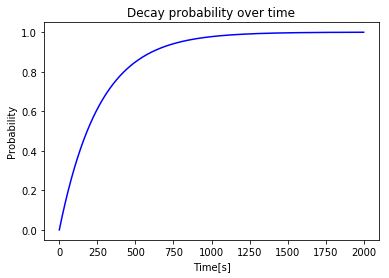

In [2]:
#first method
Tl_initial=1000
Pb_initial=0
step=1 #sec
half_life= 3.052*60 #in secondi
tot_time=2000
print('Half life:',half_life)
Tl_over_time=np.zeros(0)
Tl_over_time=np.append(Tl_over_time,Tl_initial)
Pb_over_time=np.zeros(0)
Pb_over_time=np.append(Pb_over_time,Pb_initial)
def prob_decay(t,mu=1/half_life):
    return 1-np.power(2,-mu*t)
#print(Tl_over_time)
x=np.arange(tot_time)
y=prob_decay(x)
plt.plot(x,y,'b')
plt.title('Decay probability over time')
plt.xlabel('Time[s]')
plt.ylabel('Probability')
print('Decay probability after an half life:',y[183])

498.33727952426756


Text(0.5,1,'Evolution over time')

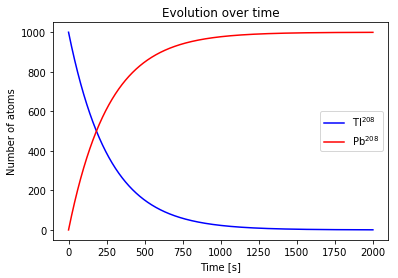

In [3]:
Tl_over_time=np.zeros(0)
Pb_over_time=np.zeros(0)
for i in range(tot_time):
    Tl_not_decayed =Tl_initial-Tl_initial*prob_decay(i)
    Pb_in_the_set= Pb_initial + Tl_initial*prob_decay(i)
    Tl_over_time= np.append(Tl_over_time, Tl_not_decayed)
    Pb_over_time= np.append(Pb_over_time, Pb_in_the_set)
#print(Tl_over_time.shape)
plt.plot(range(tot_time), Tl_over_time,'b',range(tot_time), Pb_over_time,'r')
#plt.plot(range(tot_time), Tl_over_time)
print(Tl_over_time[184])
plt.legend(('Tl$^{208}$', 'Pb$^{208}$'), loc='best')
plt.xlabel('Time [s]')
plt.ylabel('Number of atoms')
plt.title('Evolution over time')

In [6]:
#dopo una half life mi devono essere rimasti circa meta atomi di Tl
#Indeed
print('Number of Tl samples after an half life:',Tl_over_time[184])


Number of Tl samples after an half life: 498.33727952426756


Text(0,0.5,'Probability')

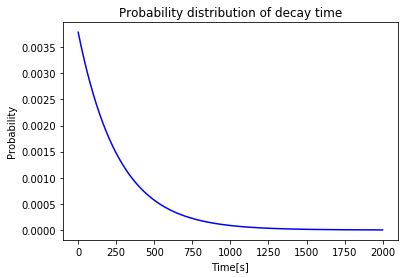

In [11]:
#inverse transform method
half_life= 3.052*60
#tau= half_life/np.log(2)
def expon_pdf(t, mu=1/half_life):
    """PDF of exponential distribution."""
    return np.exp2(-mu*t)*np.log(2)*mu

def expon_cdf(t, tau=half_life):
    """CDF of exponetial distribution."""
    return 1 - np.exp2(-t/tau)

def expon_icdf(p, mu=1/half_life):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log2(1-p)/mu

plt.plot(np.arange(tot_time), expon_pdf(np.arange(tot_time)),'b')
plt.title('Probability distribution of decay time')
plt.xlabel('Time[s]')
plt.ylabel('Probability')

1000


Text(0.5,1,'Evolution over time with the Inverse method')

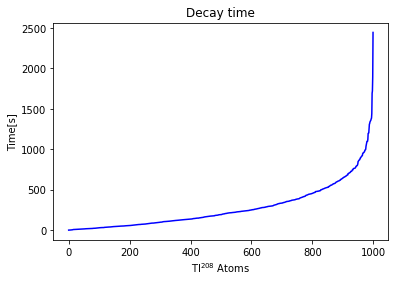

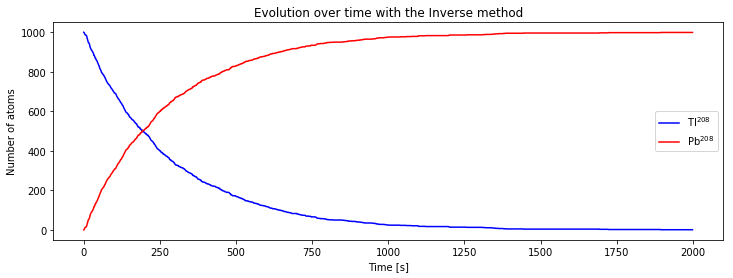

In [6]:
Tl_initial=1000
Pb_initial=0
half_life= 3.052*60 #in secondi
tot_time=2000
Tl_over_time=np.zeros(0)
Pb_over_time=np.zeros(0)
t_decay=np.zeros(0)
#genero i t_decay
for rn in range(Tl_initial):
    z = np.random.random()
    x = expon_icdf(z)
    t_decay=np.append(t_decay,x)

t_decay=np.sort(t_decay)
l=t_decay.shape[0]
print(l)
#conto decayed over time
for i in range(tot_time):
    count=0
    j=0
    while j<l:
        if t_decay[j]<=i:
            count +=1
        j +=1
    
    Tl_decayed=count
    Tl_over_time=np.append(Tl_over_time,Tl_initial-Tl_decayed)
    Pb_over_time=np.append(Pb_over_time,Tl_decayed)
plt.plot(np.arange(1000),t_decay,'b')
plt.title('Decay time')
plt.ylabel('Time[s]')
plt.xlabel('Tl$^{208}$ Atoms')
plt.figure(figsize=(12,4))
plt.plot(range(tot_time), Tl_over_time,'b',range(tot_time), Pb_over_time,'r')
plt.legend(('Tl$^{208}$', 'Pb$^{208}$'), loc='best')
plt.xlabel('Time [s]')
plt.ylabel('Number of atoms')
plt.title('Evolution over time with the Inverse method')

In [7]:
print(Tl_over_time[184])

518.0


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

See for [Bohr radius](https://docs.scipy.org/doc/scipy/reference/constants.html)

In [8]:
import scipy.constants as sc
Z=79
E=7.7*10**6*sc.e
N_alfa= 10**6
std= sc.physical_constants['Bohr radius'][0]/100

# Box-Muller method
z = np.random.rand(N_alfa)
b = np.sqrt(-2*std**(2)*np.log(1-z))
const=Z*(sc.e)**2/(2*np.pi*sc.epsilon_0*E)
print(const)
theta = 2*np.arctan(const/b)
print('Fraction of particles that bounce back:',len(theta[theta>np.pi/2])/N_alfa)

2.9547324228677744e-14
Fraction of particles that bounce back: 0.001543


In [9]:
sc.physical_constants['Bohr radius']

(0.0000, 'm', 0.0000)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

C:\Users\saret\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (10000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


True integral from 0 to 2: 1.4514014971676983
Estimate of the absolute error on the result: 2.461256014552049e-07


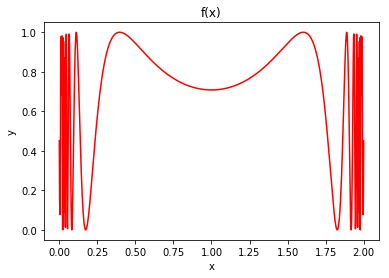

In [13]:
import scipy.integrate as integrate
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')
plt.title('f(x)')
plt.ylabel('y')
plt.xlabel('x')
I_true=integrate.quad(f,0,2,limit=10000)
print("True integral from 0 to 2:",I_true[0])
print('Estimate of the absolute error on the result:',I_true[1])

In [14]:
# Monte Carlo integration HIT_MISS
N=10000
count=0

for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("Estimated integral with HIT MISS method:",I)
#print(np.random.random())
print("Error with hit miss:",np.abs(I_true[0]-I))

Estimated integral with HIT MISS method: 1.4502
Error with hit miss: 0.001201497167698351


In [15]:
N=10000
values=np.zeros(0)

for i in range(N):
    x=2*np.random.random()
    values = np.append(values,f(x))
I_est=2*np.sum(values)/N
print("Estimsted integral with MEAN VALUE method:",I_est)
print("Error using mean value:",np.abs(I_est-I_true[0])) #this performs better

Estimsted integral with MEAN VALUE method: 1.4583712558024742
Error using mean value: 0.006969758634775891


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [17]:
def fun(x):
    x_squared=x**2
    f = np.sum(x_squared)
    #return f
    if f<=1:
        return 1
    else: 
        return 0

In [18]:
np.sum(fun(np.array([1,2,0])))
fun_values=np.zeros(N)
print(fun_values.shape)

(10000,)


In [19]:
N=10000
n_dim=2
values = 2*np.random.random(size=(N, n_dim))-1
values.shape
fun_values=np.zeros(N)
A=np.pi
for i in range(values.shape[0]):
    fun_values[i]=fun(values[i,:])

I_est=2**n_dim*np.sum(fun_values)/N
print("True Area:", A)
print("Estimated integral with 2 dimensions:", I_est)
print('Error:',np.abs(A-I_est))


True Area: 3.141592653589793
Estimated integral with 2 dimensions: 3.1324
Error: 0.009192653589793043


See [IPERSFERA](https://it.wikipedia.org/wiki/Ipersfera)

In [21]:
N=10000
n_dim=10
values = 2*np.random.random(size=(N, n_dim))-1
A_iper=np.pi**5/120
values.shape
fun_values=np.zeros(N)
for i in range(values.shape[0]):
    fun_values[i]=fun(values[i,:])
#print(fun_values)
I_est=2**n_dim*np.sum(fun_values)/N
print("True Area:", A_iper)
print("Estimated integral with 10 dimensions:", I_est)
print('Error:',np.abs(A_iper-I_est))


True Area: 2.550164039877345
Estimated integral with 10 dimensions: 3.3792
Error: 0.8290359601226549


See [for higher dimension](http://www.lce.hut.fi/teaching/S-114.1100/lect_9.pdf)

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [22]:
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    """PDF of exponential distribution."""
    return x**(-0.5)
#NON SERVONO PER L'ESERCIZIO
def weight_cdf(x):
    """CDF of exponetial distribution."""
    return 2*x**0.5

def weight_icdf(p):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return (p/2)**2

In [23]:
#WITH IMPORTANCE SAMPLING
N=10000
x=np.random.random(N)
#integral of w(x) in the domain
V=2 
I_est=1/N*np.sum(f(x)/w(x))*V
I_true=integrate.quad(f,0,1)
print('True integral:',I_true)
print("Estimated integral:", I_est)
print('Error:',np.abs(I_true[0]-I_est))

True integral: (0.8389329600133792, 1.8740564655672642e-13)
Estimated integral: 0.7570947917252833
Error: 0.08183816828809598


In [24]:
#WITH MEAN VALUE METHOD
x=np.random.random(N)
#integral of w(x) in the domain
V=1
I_est=1/N*np.sum(f(x))*V
I_true=integrate.quad(f,0,1)
print('True integral:',I_true)
print("Estimated integral:", I_est)
print('Error:',np.abs(I_true[0]-I_est))

True integral: (0.8389329600133792, 1.8740564655672642e-13)
Estimated integral: 0.841676556318564
Error: 0.0027435963051847256


Importance sampling metohd is a generalization of the mean value one, used to reduce variance exploting a weight function.